## Step 1: Set Up the Environment
 - 1.1: Install necessary libraries 
 - 1.2: Import required libraries

In [1]:
#1.1: Install necessary libraries
%pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#1.2: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


## Step 2: Load the Dataset
 - 2.1 Read the dataset and the data dictionary
 - 2.2 Explore the dataset

In [58]:
import os

# Print the current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)


Current working directory: C:\Users\avary\PatientFi_Project


In [13]:
# 2.1 Read the dataset and the data dictionary
df = pd.read_csv('credit_bureau_data.csv')

#2.2 Explore the dataset 
df.info()  # Get a summary of the dataset
df.describe()  # Get statistical summary of numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376208 entries, 0 to 376207
Columns: 249 entries, index to NA90
dtypes: float64(9), int64(240)
memory usage: 714.7 MB


index        ACCTID          AD01C          AD03E  \
count  376208.000000  3.762080e+05  376208.000000  376208.000000   
mean   416476.910332  1.022291e+10       0.588230       0.399513   
std    242153.591928  9.604813e+08       0.952189       0.887942   
min         0.000000  4.482168e+06       0.000000       0.000000   
25%    206604.750000  9.841186e+09       0.000000       0.000000   
50%    414183.500000  1.016584e+10       0.000000       0.000000   
75%    626973.500000  1.078776e+10       1.000000       0.000000   
max    836781.000000  9.453829e+10      11.000000      12.000000   

               AD06A          AD06D          AD12H          AD13B  \
count  376208.000000  376208.000000  376208.000000  376208.000000   
mean       98.123799      81.248865       0.897753      -0.618551   
std        97.941234      74.131351       1.346139       0.768949   
min        -4.000000      -4.000000       0.000000      -2.000000   
25%        25.000000      31.000000       0.000000      -1.000000   
50%        71.000000      55.000000       0.000000      -1.000000   
75%       149.000000     105.000000       1.000000      -1.000000   
max       999.000000     999.000000      17.000000       5.000000   

            AEPMAG01       AEPMAG03  ...       UTLMAG01       UTLMAG02  \
count  376208.000000  376208.000000  ...  376208.000000  376208.000000   
mean      291.205963     241.725713  ...     223.264598     284.295039   
std        68.846799     125.257927  ...      95.970863     109.380979   
min        -6.000000      -6.000000  ...      -6.000000      -6.000000   
25%       273.000000     242.000000  ...     154.000000     236.000000   
50%       300.000000     290.000000  ...     222.000000     300.000000   
75%       326.000000     318.000000  ...     290.000000     352.000000   
max       576.000000     600.000000  ...     600.000000     600.000000   

            UTLMAG03       WALSHRS1       WALSHRS2       WALSRVS1  \
count  376208.000000  376208.000000  376208.000000  376208.000000   
mean      274.831692      59.615755      48.550762      61.346774   
std       127.360576      42.686931      37.420187      37.284833   
min        -6.000000      -9.000000      -9.000000      -9.000000   
25%       230.000000      -1.000000      14.000000      41.000000   
50%       300.000000      74.000000      45.000000      69.000000   
75%       356.000000     100.000000      88.000000      99.000000   
max       600.000000     100.000000     100.000000     100.000000   

            WALSRVS2      FicoScore   VantageScore           NA90  
count  376208.000000  376208.000000  376208.000000  376208.000000  
mean       41.693095     691.385702     690.527355       0.142857  
std        33.672688      79.660955      77.084404       0.349928  
min        -9.000000     300.000000       4.000000       0.000000  
25%        13.000000     643.000000     638.000000       0.000000  
50%        34.000000     693.000000     690.000000       0.000000  
75%        68.000000     746.000000     746.000000       0.000000  
max       100.000000     850.000000     850.000000       1.000000  

[8 rows x 249 columns]

In [7]:
df.head() # View the first few rows

index       ACCTID  AD01C  AD03E  AD06A  AD06D  AD12H  AD13B  AEPMAG01  \
0      8  10190569561      0      0     65     27      0     -1       269   
1     11  10089690471      2      1      4     62      4      1       336   
2     13   9806134675      1      1     41     41      3      0       263   
3     14  10178302159      1      0     17     27      0     -1       324   
4     21  10880956305      0      0    156    156      0     -1       325   

   AEPMAG03  ...  UTLMAG01  UTLMAG02  UTLMAG03  WALSHRS1  WALSHRS2  WALSRVS1  \
0       284  ...       280       444       452        45        23        48   
1       368  ...       132       182       284        79        37        74   
2       228  ...       334       288       252       100        81       100   
3       316  ...       348       394       394        79        83        79   
4       352  ...       252       292       246       100        22       100   

   WALSRVS2  FicoScore  VantageScore  NA90  
0        23        704           655     1  
1        20        671           678     1  
2        47        611           636     1  
3        83        623           697     1  
4        22        670           665     1  

[5 rows x 249 columns]

In [9]:
df.shape

(376208, 249)

In [66]:
# Check how many unique ACCTID values are present using the column name
unique_acctid_count = df['ACCTID'].nunique()

print(f"Number of unique ACCTID values: {unique_acctid_count}")


Number of unique ACCTID values: 376208


Loan ID has 376208 unique values. It means we have data of 376208 applicants

In [13]:
data_dic = pd.read_csv('attribute_definitions.csv')

print(data_dic.head(10))

    Feature                                        Description
0     G302S  Worst rating on revolving trades in past 12 mo...
1     G305S                 Worst rating on installment trades
2     G310S       Worst rating on all trades in past 12 months
3     G311S                         Worst rating on all trades
4     JT34S  Utilization of open joint trades verified in p...
5  UTLMAG02  Utilization magnitude for revolving trades ove...
6  UTLMAG01  Utilization magnitude for non-mortgage trades ...
7  UTLMAG03  Utilization magnitude for bankcard trades over...
8     AT34B  Utilization for open trades verified in past 1...
9     ST34S  Utilization for open student loan trades verif...


## EDA and Target Data Analysis
 - **0** indicate that the applicant has never been 90 days past due.
 - **1** indicate the applicant has been 90 days past due.

In [68]:
print(df.dtypes)


index           int64
ACCTID          int64
AD01C           int64
AD03E           int64
AD06A           int64
                ...  
WALSRVS1        int64
WALSRVS2        int64
FicoScore       int64
VantageScore    int64
NA90            int64
Length: 249, dtype: object


In [10]:
# Check for missing values
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])  # Print columns with missing data and their count


Series([], dtype: int64)


In [15]:

# Check for duplicate 'index' entries where all other feature values are identical
duplicates = df[df.duplicated(subset=['ACCTID'] + list(df.columns.difference(['ACCTID', 'NA90'])), keep=False)]

# Count duplicates
print("Number of duplicate entries:", duplicates['ACCTID'].nunique())

# Show duplicates
print(duplicates)

# Remove duplicates where feature values are the same
df_cleaned = df.drop_duplicates(subset=['ACCTID'] + list(df.columns.difference(['ACCTID', 'NA90'])), keep='first')

# Save the cleaned DataFrame back to a CSV file if needed
df_cleaned.to_csv('Cleaned_Dataset.csv', index=False)


Number of duplicate entries: 0
Empty DataFrame
Columns: [index, ACCTID, AD01C, AD03E, AD06A, AD06D, AD12H, AD13B, AEPMAG01, AEPMAG03, AEPMAG04, AGG201, AGG206, AGG212, AGG601, AGG606, AGG612, AGG902, AGG910, AGG911, AGGS905, AGGS906, AGGS908, AGGS911, AT06S, AT09S, AT103S, AT104S, AT20S, AT24S, AT28A, AT30S, AT32S, AT34B, ATAP01, AU02S, AU20S, AUT203, BC01S, BC102S, BC104S, BC107S, BC20S, BC21S, BC34S, BI31S, BKC102, BKC12, BKC122, BKC318, BKC320, BKC325, BKC52, BKC54, BKC82, BKC83, BR02S, BR09S, BR21S, BR31S, BR34S, CLMAG01, CLMAG03, CO02S, CV01, CV02, CV04, CV09, CV12, CV13, CV14, CV16, CV26, DUEMAG01, FC02S, FI02S, FI101S, FI20S, FI28S, FI31S, FI34S, FR27S, FR31S, G001C, G003C, G043C, G059S, G064S, G093S, G099S, G102S, G106S, G199S, G200B, G208S, G212S, G223S, G224A, G232S, G234S, ...]
Index: []

[0 rows x 249 columns]


In [13]:
df.NA90.value_counts() # Target(Response)variable distribution across the dataset

NA90
0    322464
1     53744
Name: count, dtype: int64

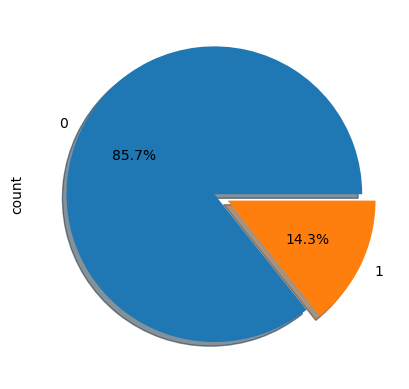

In [16]:
import matplotlib.pyplot as plt

# Assuming 'data' is DataFrame and 'Response' is the column with categorical data
df.NA90.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True)

# Display the plot
plt.show()


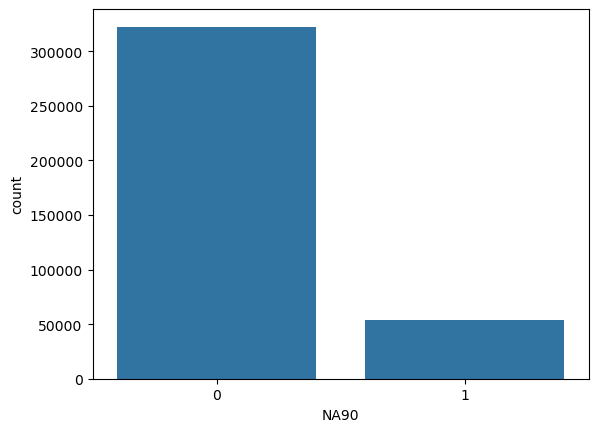

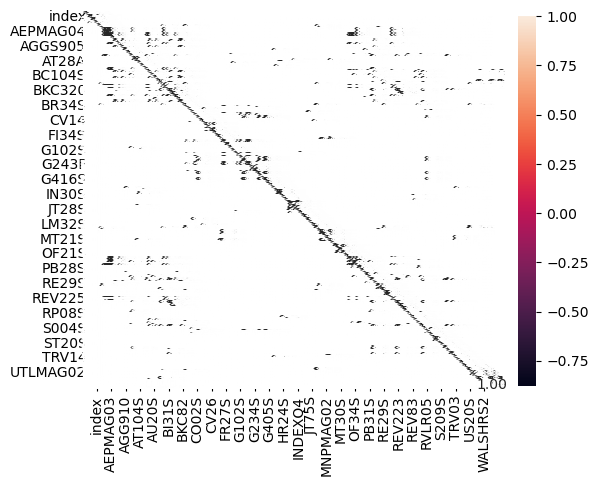

In [20]:
# Visualizations
sns.countplot(x='NA90', data=df)
plt.show()

# Pairplot or correlation heatmap
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [18]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


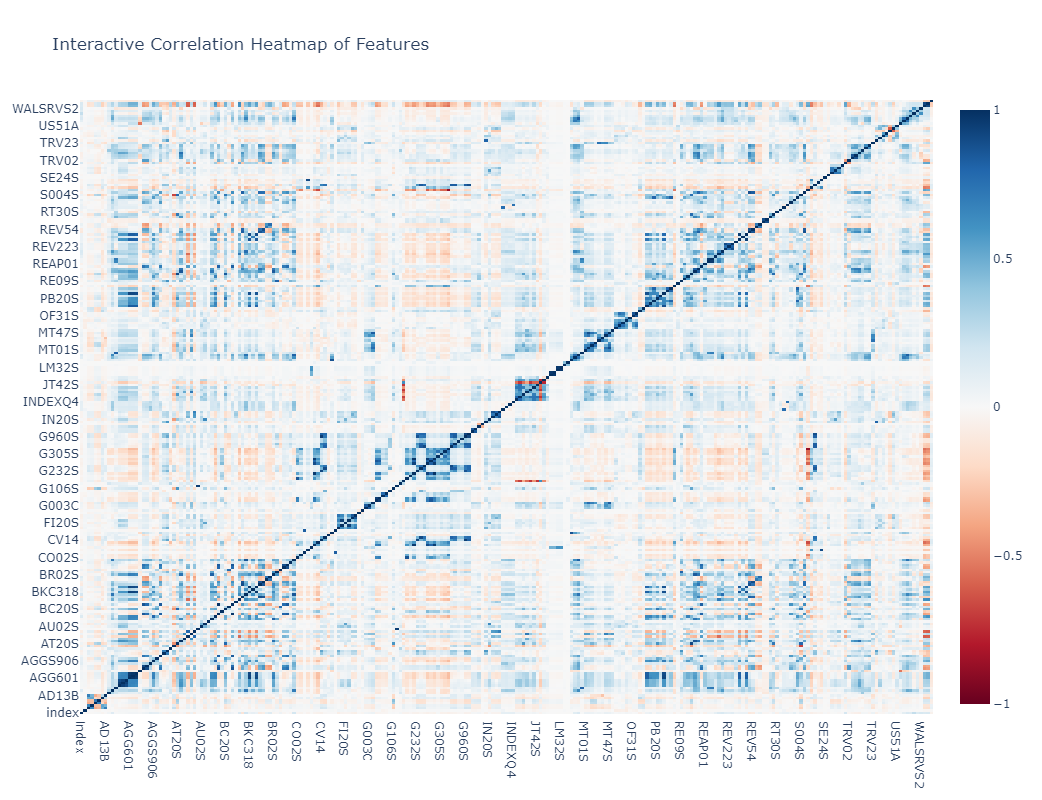

In [19]:
# Feature-to-Feature Correlation (Heatmap)/ Correlation Heatmap of Features

import plotly.graph_objects as go
import pandas as pd

# Load dataset
df = pd.read_csv('credit_bureau_data.csv')  # Ensure this points to dataset file

# Calculate the correlation matrix
corr = df.corr()

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr.values,  # Correlation values
    x=corr.columns,  # Column names as x-axis labels
    y=corr.index,    # Row names as y-axis labels
    colorscale='RdBu',  # Color scale for the heatmap
    zmid=0,  # Sets the mid-point for the color scaling at zero
    hoverongaps=False  # Ensures that gaps do not show up on hover
))

# Update layout to improve readability
fig.update_layout(
    title='Interactive Correlation Heatmap of Features',
    xaxis_nticks=36,  # Adjust tick density along x-axis
    yaxis_nticks=36,  # Adjust tick density along y-axis
    xaxis={'side': 'bottom'},  # X-axis on the bottom for better visibility
    width=900,  # Adjust the width to accommodate more features
    height=800,  # Adjust the height to accommodate more features
    autosize=True  # Allow automatic resizing based on the dimensions of the graph
)

# Show the figure
fig.show()


In [80]:
# Identifying and Dropping Columns

import pandas as pd

# Load the dataset
data = pd.read_csv('credit_bureau_data.csv')

# Identify columns where more than 50% of the values are less than zero
cols_to_drop = data.columns[(data < 0).sum() / data.shape[0] > 0.5]

# Print the number of columns to be dropped and their names
print(f"Number of columns to drop: {len(cols_to_drop)}")
print(f"Columns to drop: {list(cols_to_drop)}")

# Drop these columns
data = data.drop(columns=cols_to_drop)

# Replace remaining values less than zero with 0 in the dataframe
data[data < 0] = 0

# Save the cleaned dataset
data.to_csv('cleaned_credit_bureau_data.csv', index=False)

# Convert summary to DataFrame for better visualization
dropped_df = pd.read_csv('cleaned_credit_bureau_data.csv')

dropped_df.shape


Number of columns to drop: 65
Columns to drop: ['AD13B', 'BI31S', 'CO02S', 'CV01', 'CV02', 'CV04', 'CV09', 'FC02S', 'FI28S', 'FI31S', 'FI34S', 'FR27S', 'FR31S', 'G001C', 'G003C', 'G099S', 'G212S', 'G223S', 'G243F', 'G405S', 'G416S', 'G417S', 'HI06S', 'HI20S', 'HR06S', 'HR24S', 'JT28S', 'JT34S', 'JT53S', 'JT80S', 'LM18S', 'LM20S', 'LM30S', 'LM32S', 'MD02S', 'MD106S', 'MT24S', 'MT25S', 'MT30S', 'MTAP01', 'OF31S', 'OF34S', 'PB06S', 'PB101S', 'PB20S', 'PB21S', 'PB28S', 'PB31S', 'PB35S', 'PDMAG1A', 'RP02S', 'RP08S', 'S071B', 'S204S', 'S209S', 'SE24S', 'SE31S', 'ST06S', 'ST20S', 'ST34S', 'STD225', 'TRV23', 'US101S', 'US27S', 'US31S']


(376208, 184)

In [109]:
# Model Evaluation Before Balancing (on Original Data)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


# Load the dataset
data = pd.read_csv('cleaned_credit_bureau_data.csv')

# Split data into features and target
X = data.drop(['NA90', 'index', 'ACCTID'], axis=1)
y = data['NA90']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1),
    "KNN": KNeighborsClassifier(n_jobs=-1)
}

# Define cross-validation
strat_kfold = StratifiedKFold(n_splits=5)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}

# Dictionary to store cv results for each classifier
results = {}

# Evaluate each model using cross-validation
for name, classifier in classifiers.items():
    print(f"Starting training and evaluation of {name}...")
    cv_results = cross_validate(classifier, X_train, y_train, cv=strat_kfold, scoring=scoring, n_jobs=-1, return_estimator=True)
    
    # Save the best model (example: based on average F1 score)
    best_model_index = np.argmax(cv_results['test_f1_score'])
    joblib.dump(cv_results['estimator'][best_model_index], f'{name}_best_model.joblib')

    # Store results
    results[name] = {
        'Average Accuracy': np.mean(cv_results['test_accuracy']),
        'Average Precision': np.mean(cv_results['test_precision']),
        'Average Recall': np.mean(cv_results['test_recall']),
        'Average F1 Score': np.mean(cv_results['test_f1_score'])
    }
    print(f"Training and evaluation of {name} completed.")

# Print evaluation results for each classifier
for classifier, metrics in results.items():
    print(f"\nClassifier: {classifier}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Optional: Evaluate a specific model on the test set, e.g., Random Forest
loaded_rf_model = joblib.load('Random Forest_best_model.joblib')
test_predictions_rf = loaded_rf_model.predict(X_test)
print("\nRandom Forest Test Metrics:")
print("Test Accuracy:", accuracy_score(y_test, test_predictions_rf))
print("Test Precision:", precision_score(y_test, test_predictions_rf, average='macro'))
print("Test Recall:", recall_score(y_test, test_predictions_rf, average='macro'))
print("Test F1 Score:", f1_score(y_test, test_predictions_rf, average='macro'))


Starting training and evaluation of Decision Tree...
Training and evaluation of Decision Tree completed.
Starting training and evaluation of Random Forest...
Training and evaluation of Random Forest completed.
Starting training and evaluation of KNN...
Training and evaluation of KNN completed.

Classifier: Decision Tree
Average Accuracy: 0.7682
Average Precision: 0.5453
Average Recall: 0.5493
Average F1 Score: 0.5470

Classifier: Random Forest
Average Accuracy: 0.8582
Average Precision: 0.7366
Average Recall: 0.5088
Average F1 Score: 0.4808

Classifier: KNN
Average Accuracy: 0.8363
Average Precision: 0.5440
Average Recall: 0.5132
Average F1 Score: 0.5031

Random Forest Test Metrics:
Test Accuracy: 0.8578985141277478
Test Precision: 0.7226487005673989
Test Recall: 0.507907979374652
Test F1 Score: 0.4790446365683925


In [19]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [41]:
### Workflow to Use SMOTE before PCA

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib  # For saving models

# Load the dataset
data = pd.read_csv('cleaned_credit_bureau_data.csv')

# Confirm the presence of 'ACCTID' before dropping
print("Columns before dropping:", data.columns)

# Drop the target variable and identifiers to prepare for PCA
features = data.drop(['NA90'], axis=1)  # Keep 'ACCTID' and 'index' for now
target = data['NA90']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Confirm the presence of 'ACCTID' and 'index' in X_train
print("Columns in X_train after split:", X_train.columns)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train.drop(['ACCTID', 'index'], axis=1), y_train)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test.drop(['ACCTID', 'index'], axis=1))

# Save the scaler for future use
joblib.dump(scaler, 'scaler.pkl')

# Apply PCA
pca = PCA(n_components=13)  # Adjust based on variance to preserve
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Save the PCA model for future use
joblib.dump(pca, 'pca_model.pkl')

# Convert the principal components for training and testing sets into DataFrames
train_pca_df = pd.DataFrame(data=X_train_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
test_pca_df = pd.DataFrame(data=X_test_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Adding identifiers and target variable back for traceability and use in further analysis
train_pca_df['Loan Id'] = X_train['ACCTID'].reset_index(drop=True)
train_pca_df['Response'] = y_train_smote.reset_index(drop=True)
#train_pca_df['Index'] = X_train['index'].reset_index(drop=True)
test_pca_df['Loan Id'] = X_test['ACCTID'].reset_index(drop=True)
test_pca_df['Response'] = y_test.reset_index(drop=True)
#test_pca_df['Index'] = X_test['index'].reset_index(drop=True)

# Save the PCA-transformed training and testing data to CSV files
train_pca_df.to_csv('train_pca_transformed_data.csv', index=False)
test_pca_df.to_csv('test_pca_transformed_data.csv', index=False)

# Display resulting dimensions and first few rows of the transformed datasets
print("Training PCA applied and data saved to 'train_pca_transformed_data.csv'")
print("Testing PCA applied and data saved to 'test_pca_transformed_data.csv'")
print(f"Number of PCA components: {pca.n_components_}")
print(f"Number of training data points: {train_pca_df.shape[0]}")
print(f"Number of testing data points: {test_pca_df.shape[0]}")
print("First few rows of the training PCA-transformed dataset:")
print(train_pca_df.head())
print("First few rows of the testing PCA-transformed dataset:")
print(test_pca_df.head())


Columns before dropping: Index(['index', 'ACCTID', 'AD01C', 'AD03E', 'AD06A', 'AD06D', 'AD12H',
       'AEPMAG01', 'AEPMAG03', 'AEPMAG04',
       ...
       'UTLMAG01', 'UTLMAG02', 'UTLMAG03', 'WALSHRS1', 'WALSHRS2', 'WALSRVS1',
       'WALSRVS2', 'FicoScore', 'VantageScore', 'NA90'],
      dtype='object', length=184)
Columns in X_train after split: Index(['index', 'ACCTID', 'AD01C', 'AD03E', 'AD06A', 'AD06D', 'AD12H',
       'AEPMAG01', 'AEPMAG03', 'AEPMAG04',
       ...
       'US51A', 'UTLMAG01', 'UTLMAG02', 'UTLMAG03', 'WALSHRS1', 'WALSHRS2',
       'WALSRVS1', 'WALSRVS2', 'FicoScore', 'VantageScore'],
      dtype='object', length=183)
Training PCA applied and data saved to 'train_pca_transformed_data.csv'
Testing PCA applied and data saved to 'test_pca_transformed_data.csv'
Number of PCA components: 13
Number of training data points: 451570
Number of testing data points: 112863
First few rows of the training PCA-transformed dataset:
        PC1        PC2       PC3       PC4      

In [97]:

print("Training set shape:", train_pca_df.shape)
print("Testing set shape:", test_pca_df.shape)
print("Training target distribution:\n", y_train.value_counts())
print("Testing target distribution:\n", y_test.value_counts())

Training set shape: (451570, 15)
Testing set shape: (112863, 15)
Training target distribution:
 NA90
0    225785
1     37560
Name: count, dtype: int64
Testing target distribution:
 NA90
0    96679
1    16184
Name: count, dtype: int64


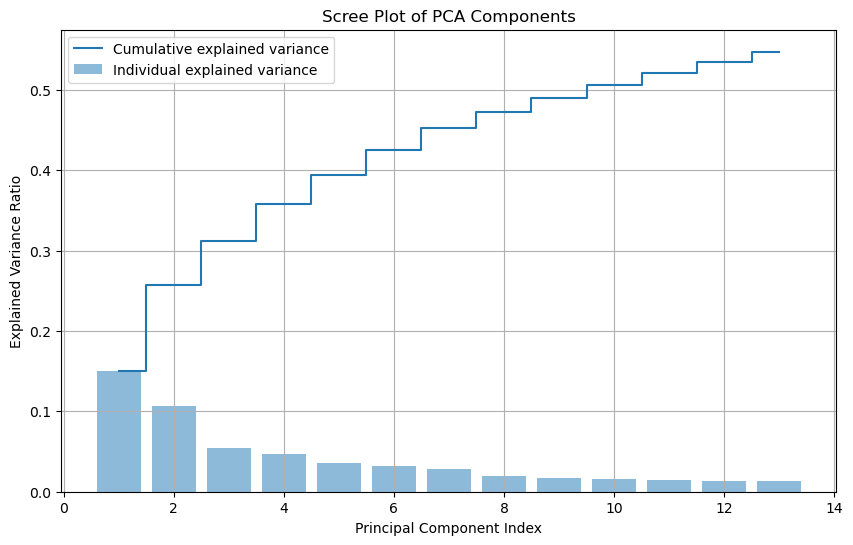

In [43]:
import matplotlib.pyplot as plt

# Calculate the explained variance ratios from the PCA model
explained_variance = pca.explained_variance_ratio_

# Generate the Scree Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of PCA Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [11]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import time


In [113]:
## Model Evaluation After SMOTE & PCA Respectively

import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import joblib

# Load the PCA-transformed data
train_pca_df = pd.read_csv('train_pca_transformed_data.csv')
test_pca_df = pd.read_csv('test_pca_transformed_data.csv')

# Separate features and target variable
X_train = train_pca_df.drop(['Loan Id', 'Response'], axis=1)
y_train = train_pca_df['Response']
X_test = test_pca_df.drop(['Loan Id', 'Response'], axis=1)
y_test = test_pca_df['Response']

# Define StratifiedKFold for cross-validation
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1),
    "KNN": KNeighborsClassifier(n_jobs=-1)
}

# Metrics to evaluate
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}

# Evaluate each model using cross-validation
results_df = pd.DataFrame()  # DataFrame to store results
for name, model in classifiers.items():
    print(f"Starting training and evaluation of {name}...")
    cv_results = cross_validate(model, X_train, y_train, cv=strat_kfold, scoring=scoring, n_jobs=-1, return_estimator=True)

    # Saving the first trained model from cross-validation
    joblib.dump(cv_results['estimator'][0], f'{name}_model.joblib')
    print(f"{name} model saved to '{name}_model.joblib'.")

    # Collecting results for each classifier
    results = {
        'Classifier': name,
        'Average Accuracy': np.mean(cv_results['test_accuracy']),
        'Average Precision': np.mean(cv_results['test_precision']),
        'Average Recall': np.mean(cv_results['test_recall']),
        'Average F1 Score': np.mean(cv_results['test_f1_score'])
    }
    results_df = pd.concat([results_df, pd.DataFrame([results])], ignore_index=True)

    # Print formatted results
    print(f"Classifier: {name}")
    print(f"Average Accuracy: {results['Average Accuracy']:.4f}")
    print(f"Average Precision: {results['Average Precision']:.4f}")
    print(f"Average Recall: {results['Average Recall']:.4f}")
    print(f"Average F1 Score: {results['Average F1 Score']:.4f}")
    print("-----------------------\n")

# Save results to CSV
results_df.to_csv('model_evaluation_results.csv', index=False)
print("Saved model evaluation results to 'model_evaluation_results.csv'.")


Starting training and evaluation of Decision Tree...
Decision Tree model saved to 'Decision Tree_model.joblib'.
Classifier: Decision Tree
Average Accuracy: 0.6806
Average Precision: 0.6808
Average Recall: 0.6806
Average F1 Score: 0.6806
-----------------------

Starting training and evaluation of Random Forest...
Random Forest model saved to 'Random Forest_model.joblib'.
Classifier: Random Forest
Average Accuracy: 0.7854
Average Precision: 0.7864
Average Recall: 0.7854
Average F1 Score: 0.7852
-----------------------

Starting training and evaluation of KNN...
KNN model saved to 'KNN_model.joblib'.
Classifier: KNN
Average Accuracy: 0.7678
Average Precision: 0.7949
Average Recall: 0.7678
Average F1 Score: 0.7623
-----------------------

Saved model evaluation results to 'model_evaluation_results.csv'.


In [117]:
# Train and Evaluate (Cross-Validation) Multiple Random Forest Configurations on PCA-transformed Dataset.

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
import time
import joblib

# Load training data
train_pca_df = pd.read_csv('train_pca_transformed_data.csv')
X_train_pca = train_pca_df.drop(['Loan Id', 'Response'], axis=1)
y_train_smote = train_pca_df['Response']

# Define classifiers with different depths
classifiers = {
    "Random Forest Default": RandomForestClassifier(n_jobs=-1),
    "Random Forest Depth 10": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, n_jobs=-1),
    "Random Forest Depth 7": RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=10, n_jobs=-1),
    "Random Forest Depth 3": RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=10, n_jobs=-1),
}

# Prepare a DataFrame to store all results
results_df = pd.DataFrame()

# Stratified K-Fold for cross-validation
strat_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Evaluate each model using cross-validation
for name, model in classifiers.items():
    start_time = time.time()  # Start the timer
    print(f"Starting training and evaluation of {name}...")
    
    cv_results = cross_validate(model, X_train_pca, y_train_smote, cv=strat_kfold, scoring={
        'accuracy': 'accuracy',
        'precision': 'precision_macro',
        'recall': 'recall_macro',
        'f1': 'f1_macro'
    }, n_jobs=-1, return_estimator=True)

    # Save the first trained model for each classifier
    joblib.dump(cv_results['estimator'][0], f'{name}_model.joblib')
    elapsed_time = time.time() - start_time
    print(f"Training and evaluation of {name} completed. Time taken: {elapsed_time:.2f} seconds.")

    # Collect results
    results = {
        'Classifier': name,
        'Average Accuracy': np.mean(cv_results['test_accuracy']),
        'Average Precision': np.mean(cv_results['test_precision']),
        'Average Recall': np.mean(cv_results['test_recall']),
        'Average F1 Score': np.mean(cv_results['test_f1']),
        'Elapsed Time (s)': elapsed_time
    }
    results_df = pd.concat([results_df, pd.DataFrame([results])], ignore_index=True)

# Save results to CSV
results_df.to_csv('RF_model_cross_validation_results.csv', index=False)
print("Saved cross-validation results to 'RF_model_cross_validation_results.csv'.")
print(results_df)


Starting training and evaluation of Random Forest Default...
Training and evaluation of Random Forest Default completed. Time taken: 228.71 seconds.
Starting training and evaluation of Random Forest Depth 10...
Training and evaluation of Random Forest Depth 10 completed. Time taken: 119.46 seconds.
Starting training and evaluation of Random Forest Depth 7...
Training and evaluation of Random Forest Depth 7 completed. Time taken: 86.43 seconds.
Starting training and evaluation of Random Forest Depth 3...
Training and evaluation of Random Forest Depth 3 completed. Time taken: 42.49 seconds.
Saved cross-validation results to 'RF_model_cross_validation_results.csv'.
               Classifier  Average Accuracy  Average Precision  \
0   Random Forest Default          0.777492           0.778363   
1  Random Forest Depth 10          0.703787           0.707998   
2   Random Forest Depth 7          0.690480           0.695324   
3   Random Forest Depth 3          0.660750           0.666004   

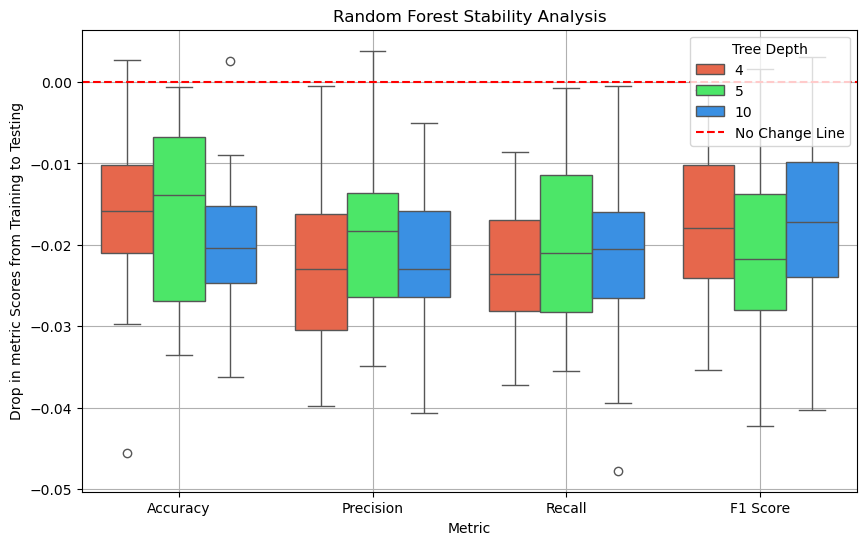

In [63]:
# Plot the Random Forest Data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df_stability is pre-populated with the necessary data
# Example data setup (please replace this with actual data)
np.random.seed(0)
depths = [3, 7, 10]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
data = {
    'Depth': np.repeat(depths, 100),
    'Metric': np.tile(np.repeat(metrics, 25), 3),
    'Change': np.random.normal(-0.02, 0.01, 300)  # Simulating drop in metric scores
}
df_stability = pd.DataFrame(data)

my_palette = ['#ff5733', '#33ff57', '#1E90FF']

# Plotting Random Forest Stability Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Metric', y='Change', hue='Depth', data=df_stability, palette=my_palette)
plt.axhline(0, linestyle='--', color='red', label='No Change Line')
plt.title('Random Forest Stability Analysis')
plt.ylabel('Drop in metric Scores from Training to Testing')
plt.xlabel('Metric')
plt.legend(title='Tree Depth', loc='upper right')
plt.grid(True)
plt.show()



In [ ]:
## Random Forest Hyperparameter Tunning (with Randomized Search)


import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, make_scorer
import time

print("Loading the PCA-transformed training data...")
train_pca_df = pd.read_csv('train_pca_transformed_data.csv')
X_train_pca_smote = train_pca_df.drop(['Loan Id', 'Response'], axis=1)
y_train_smote = train_pca_df['Response']
print("Data loaded successfully.")

subset_frac = 0.2  # 20% of the data
subset_index = np.random.choice(X_train_pca_smote.index, int(len(X_train_pca_smote) * subset_frac), replace=False)

X_train_subset = X_train_pca_smote.loc[subset_index]
y_train_subset = y_train_smote.loc[subset_index]


#Set up hyperparameter grid for RandomForest
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 15],
    'min_samples_leaf': [1, 4]
}

print(f"Hyperparameter grid:\n{param_dist}")

# Initialize cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings sampled
    cv=skf,
    scoring={'accuracy': make_scorer(accuracy_score),
             'precision': make_scorer(precision_score, average='macro'),
             'recall': make_scorer(recall_score, average='macro'),
             'f1': make_scorer(f1_score, average='macro')},
    refit='recall',  # Refit using the best recall score
    return_train_score=True,
    n_jobs=1,  # Run sequentially to avoid PicklingError
    verbose=2  # Display progress
)

# Track time and fit RandomizedSearchCV
print("Starting RandomizedSearchCV fitting...")
start_time = time.time()
random_search.fit(X_train_pca_smote, y_train_smote)  # Use the correct variables
end_time = time.time()

# Print results
print(f"RandomizedSearchCV fitting completed in {end_time - start_time:.2f} seconds.")
print("Best hyperparameters found: ", random_search.best_params_)
print("Best recall found: ", random_search.best_score_)

# Retrieve all results
results = pd.DataFrame(random_search.cv_results_)

# Save the results to a CSV file
results.to_csv('RF_random_search_results.csv', index=False)

# Display the best score for each metric
best_index = random_search.best_index_
best_results = results.loc[best_index, ['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']]
print("\nBest Scores from RandomizedSearchCV for each metric:")
print(best_results)

# Optionally, save the best model
joblib.dump(random_search.best_estimator_, 'best_random_forest_model.joblib')

In [ ]:
#KNN Hyperparameter Tuning 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import time

print("Loading the PCA-transformed training data...")
train_pca_df = pd.read_csv('train_pca_transformed_data.csv')
X_train_pca_smote = train_pca_df.drop(['Loan Id', 'Response'], axis=1)
y_train_smote = train_pca_df['Response']
print("Data loaded successfully.")

subset_frac = 0.3  # 30% of the data
subset_index = np.random.choice(X_train_pca_smote.index, int(len(X_train_pca_smote) * subset_frac), replace=False)

X_train_subset = X_train_pca_smote.loc[subset_index]
y_train_subset = y_train_smote.loc[subset_index]


# Define the model
knn = KNeighborsClassifier()

# Create the parameter grid
param_grid = {
    'n_neighbors': [5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Setup the grid search
grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=3,
    scoring=make_scorer(recall_score, average='macro'),  # Focusing on recall
    n_jobs=-1,
    verbose=2
)

# Track time and fit
start_time = time.time()
grid_search_knn.fit(X_train_subset, y_train_subset)
end_time = time.time()

# Print results
print("KNN Grid Search took {:.2f} seconds.".format(end_time - start_time))
print("Best parameters found: ", grid_search_knn.best_params_)
print("Best recall found: ", grid_search_knn.best_score_)


Evaluating Random Forest on test data...
Evaluating KNN on test data...
Results for Random Forest:
Accuracy: 0.6695
Precision: 0.5686
Recall: 0.6271
F1 Score: 0.5553

Results for KNN:
Accuracy: 0.5929
Precision: 0.5562
Recall: 0.6132
F1 Score: 0.5112

Evaluating Random Forest on test data...


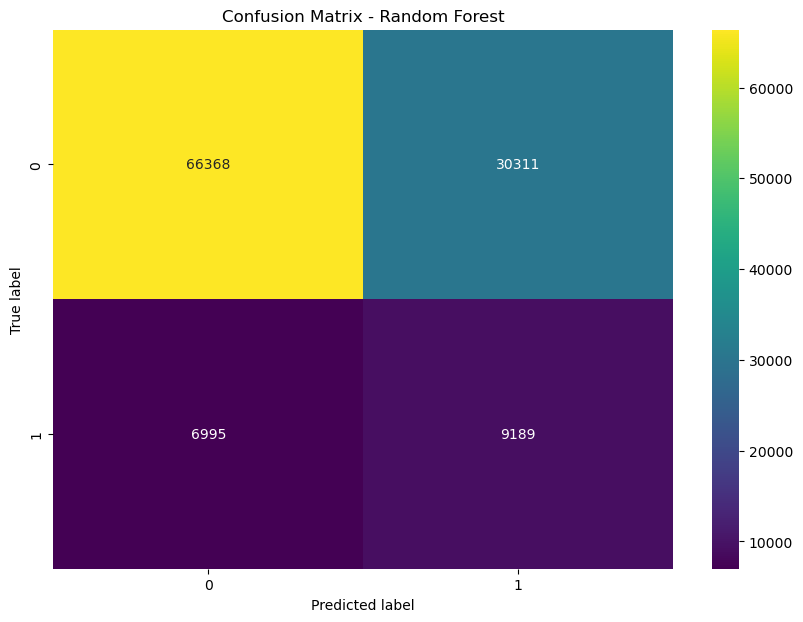

Evaluating KNN on test data...


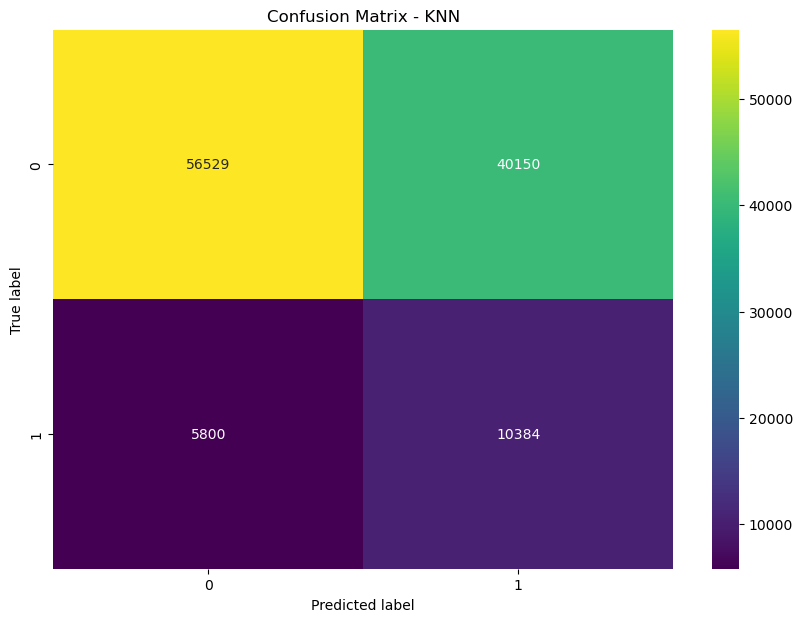

In [29]:
# Evaluate on the Test Set

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import warnings

warnings.filterwarnings("ignore", category=UserWarning)  # Suppress feature name mismatch warnings

# Load PCA-transformed test data
test_pca_df = pd.read_csv('test_pca_transformed_data.csv')
X_test_pca = test_pca_df.drop(['Loan Id', 'Response'], axis=1)
y_test = test_pca_df['Response']


# Load the models
rf_model = joblib.load('best_random_forest_model.joblib')
knn_model = joblib.load('best_knn_model.joblib')

# Dictionary of models
models = {
    "Random Forest": rf_model,
    "KNN": knn_model
}

# Evaluate each model
test_results = {}
for name, model in models.items():
    print(f"Evaluating {name} on test data...")
    test_predictions = model.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, test_predictions)
    precision = precision_score(y_test, test_predictions, average='macro')
    recall = recall_score(y_test, test_predictions, average='macro')
    f1 = f1_score(y_test, test_predictions, average='macro')
    
    test_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print results
for classifier, metrics in test_results.items():
    print(f"Results for {classifier}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("")

# Define the classifiers
classifiers = {
    "Random Forest": rf_model,
    "KNN": knn_model
}
    
    # Generate and plot confusion matrices
for name, model in classifiers.items():
    print(f"Evaluating {name} on test data...")
    y_pred = model.predict(X_test_pca)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')  # viridis is just an example, change to other color maps as needed
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()